<!-- <div style='float:right'><img width=200 src="hse-logo.jpg" alt="HSE logo"></img></div> -->
<div style='float:left'><img width=400 src="python_logo.png" alt="Python"></img></div>

<div style='float:right'>

<h1 align='center'>Язык программирования Python</h1>

<h2 align='right'>Бобер Станислав Алексеевич</h2>
<h3 align='right'>Ст. преп. Департамента Прикладной Математики</h3>
<h3 align='right'>e-mail: sbober@hse.ru, stas.bober@gmail.com</h3>
</div>


<h1 align='center'>Лекция 5. Введение в модуль Pandas</h1>

### Подключение модуля

In [1]:
# подключение модуля и сокращение названия для удобства
import pandas as pd

# для использования функций numpy
import numpy as np

#для отрисовки графиков
import matplotlib.pyplot as plt
%matplotlib inline

### Ряд (pd.Series)

### Ряд - одномерный маркированный массив, содержащий элементы произвольного типа

#### Маркеры являются индексами элементов

#### Создание ряда

```
s = pd.Series(data, index=index)
```

In [2]:
s = pd.Series([1,2,3,np.nan,5,6])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
5    6.0
dtype: float64

In [3]:
# явно указаны индексы
s = pd.Series([1,2,3,np.nan,5,6], index=list('abcdef'))
s

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
f    6.0
dtype: float64

In [4]:
# создание ряда из одного числа
pd.Series(37, index=list(range(10)))

0    37
1    37
2    37
3    37
4    37
5    37
6    37
7    37
8    37
9    37
dtype: int64

In [5]:
# преобразование словаря в Series
print(pd.Series({'a':1, 'b':2, 'c':3}))

# для индексов используется порядок, в котором элементы добавлены в словарь
print(pd.Series({'a':1, 'c':2, 'b':3}))

a    1
b    2
c    3
dtype: int64
a    1
c    2
b    3
dtype: int64


#### Работа с рядом как с NumPy массивом

In [6]:
# работа с рядом как с массивом

s[0]

1.0

In [7]:
s[:3]

a    1.0
b    2.0
c    3.0
dtype: float64

In [8]:
s[s>s.median()]

e    5.0
f    6.0
dtype: float64

In [9]:
s[[3,2,2,1]]

d    NaN
c    3.0
c    3.0
b    2.0
dtype: float64

In [10]:
s**2

a     1.0
b     4.0
c     9.0
d     NaN
e    25.0
f    36.0
dtype: float64

In [11]:
np.sin(s)

a    0.841471
b    0.909297
c    0.141120
d         NaN
e   -0.958924
f   -0.279415
dtype: float64

In [12]:
s + s

a     2.0
b     4.0
c     6.0
d     NaN
e    10.0
f    12.0
dtype: float64

In [13]:
print(s[1:])
print(s[:-1])
s[1:] + s[:-1]

b    2.0
c    3.0
d    NaN
e    5.0
f    6.0
dtype: float64
a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
dtype: float64


a     NaN
b     4.0
c     6.0
d     NaN
e    10.0
f     NaN
dtype: float64

#### Работа с рядом как со словарем

In [14]:
s['a']

1.0

In [15]:
print(s)
s['f'] = 7
print(s)

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
f    6.0
dtype: float64
a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
f    7.0
dtype: float64


In [16]:
s.get('g', np.nan)

nan

In [17]:
s.min(), s.max(), s.mean(), s.median(), s.std()

(1.0, 7.0, 3.6, 3.0, 2.408318915758459)

In [18]:
# вычисление функции на каждом элементе ряда
s.map(lambda x:x*2)

a     2.0
b     4.0
c     6.0
d     NaN
e    10.0
f    14.0
dtype: float64

In [19]:
# вызов агрегирующих функций
s.agg([sum, min, max])

sum    18.0
min     1.0
max     7.0
dtype: float64

#### Визуализация Series

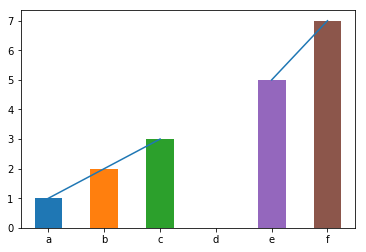

In [20]:
s.plot(kind='bar')
s.plot(kind='line')

### Таблица (pd.DataFrame)

### Таблица - двумерный массив с маркированными строками и столбцами

#### Аналогии: таблица SQL, таблица Excel
#### Маркеры - индексы строк и названия столбцов

#### Создание таблицы

```
df = pd.DataFrame(data, index=index, columns=columns)
```

In [21]:
# из списка, как при создании ряда
# созданный ряд становится столбцом таблицы

df = pd.DataFrame([1,2,3,np.nan,5,6])
df

,0
0,1.0
1,2.0
2,3.0
3,NaN
4,5.0
5,6.0


In [22]:
# из списка списков

df = pd.DataFrame([[i*j for j in range(5)] for i in range(5)])
df

,0,1,2,3,4
0,0,0,0,0,0
1,0,1,2,3,4
2,0,2,4,6,8
3,0,3,6,9,12
4,0,4,8,12,16


In [23]:
# на основе словаря
# ключи становятся названиями столбцов

d = {'col_a':[1,2,3], 'col_b':[4,5,6]}

df = pd.DataFrame(d)
df

,col_a,col_b
0,1,4
1,2,5
2,3,6


In [24]:
# на основе словаря из рядов
# ключи становятся названиями столбцов
# индексы рядов - индексами строк
# откуда взялись NaN?

d = {'col_a':pd.Series([1,2,3], index=['row_a', 'row_b', 'row_c']), 
     'col_b':pd.Series([4,5,6], index=['row_b', 'row_c', 'row_d'])
    }

df = pd.DataFrame(d)
df

,col_a,col_b
row_a,1.0,NaN
row_b,2.0,4.0
row_c,3.0,5.0
row_d,NaN,6.0


In [25]:
# выбрать нужные индексы (из имеющихся в d)

df = pd.DataFrame(d, index=['row_b', 'row_a'])
df

,col_a,col_b
row_b,2,4.0
row_a,1,NaN


In [26]:
# выбрать нужные столбцы (из имеющихся в d)

df = pd.DataFrame(d, index=['row_b', 'row_a'], columns=['col_a'])
df

,col_a
row_b,2
row_a,1


#### Работа с DataFrame

In [27]:
df = pd.DataFrame(np.arange(36).reshape(6,6),
                 index = list('abcdef'),
                 columns = ['one', 'two', 'three', 'four', 'five', 'six'])
df

,one,two,three,four,five,six
a,0,1,2,3,4,5
b,6,7,8,9,10,11
c,12,13,14,15,16,17
d,18,19,20,21,22,23
e,24,25,26,27,28,29
f,30,31,32,33,34,35


In [28]:
# выбор столбца
df['one']

a     0
b     6
c    12
d    18
e    24
f    30
Name: one, dtype: int32

In [29]:
# выбор нескольких столбцов
# указывается список из названий столбцов
df[['one', 'two']]

,one,two
a,0,1
b,6,7
c,12,13
d,18,19
e,24,25
f,30,31


In [30]:
# выбор строки
df.loc['a']

one      0
two      1
three    2
four     3
five     4
six      5
Name: a, dtype: int32

In [31]:
# выбор нескольких строк списком индексов
df.loc[['a','c','e']]

,one,two,three,four,five,six
a,0,1,2,3,4,5
c,12,13,14,15,16,17
e,24,25,26,27,28,29


In [32]:
# срез с использованием индексов строк
df.loc['b':'e':2]

,one,two,three,four,five,six
b,6,7,8,9,10,11
d,18,19,20,21,22,23


In [33]:
# выбор строки целочисленным индексом
df.iloc[0]

one      0
two      1
three    2
four     3
five     4
six      5
Name: a, dtype: int32

In [34]:
# выбор нескольких строк списком целочисленных индексов
df.iloc[[0,1,2]]

,one,two,three,four,five,six
a,0,1,2,3,4,5
b,6,7,8,9,10,11
c,12,13,14,15,16,17


In [35]:
# срез с использованием целочисленных индексов строк
df.iloc[1:5:2]

,one,two,three,four,five,six
b,6,7,8,9,10,11
d,18,19,20,21,22,23


#### Выбор и индексация в DataFrame


|Операция                       | Синтаксис       | Результат |
| ----------------------------- | --------------- | --------- |
|Выбор столбца                  | `df[col]`       | Series    |
|Выбор строки по индексу        | `df.loc[label]` | Series    |
|Выбор строки по целому индексу | `df.iloc[loc]`  | Series    | 
|Срез по строкам                | `df[i0:i1:di]`  | DataFrame |
|Выбор строк по булевой маске   | `df[bool_vec]`  | DataFrame |


In [36]:
# булевы маски
df['four']>10

a    False
b    False
c     True
d     True
e     True
f     True
Name: four, dtype: bool

In [37]:
df[df['four']>10]

,one,two,three,four,five,six
c,12,13,14,15,16,17
d,18,19,20,21,22,23
e,24,25,26,27,28,29
f,30,31,32,33,34,35


In [38]:
df.loc['a'] > 3

one      False
two      False
three    False
four     False
five      True
six       True
Name: a, dtype: bool

In [39]:
df.T[df.loc['a']>3].T

,five,six
a,4,5
b,10,11
c,16,17
d,22,23
e,28,29
f,34,35


In [40]:
# добавление столбца
df['seven'] = df['one'] + df['six']
df

,one,two,three,four,five,six,seven
a,0,1,2,3,4,5,5
b,6,7,8,9,10,11,17
c,12,13,14,15,16,17,29
d,18,19,20,21,22,23,41
e,24,25,26,27,28,29,53
f,30,31,32,33,34,35,65


In [41]:
# удаление столбцов
# del df['seven']
df.pop('seven')

a     5
b    17
c    29
d    41
e    53
f    65
Name: seven, dtype: int32

In [42]:
df

,one,two,three,four,five,six
a,0,1,2,3,4,5
b,6,7,8,9,10,11
c,12,13,14,15,16,17
d,18,19,20,21,22,23
e,24,25,26,27,28,29
f,30,31,32,33,34,35


In [43]:
# добавление столбцов при помощи метода assign
# имя аргумента = название столца
# если значение аргумента - функция, то она будет вызвана

df.assign(seven = lambda f: f['three']+f['four'])

,one,two,three,four,five,six,seven
a,0,1,2,3,4,5,5
b,6,7,8,9,10,11,17
c,12,13,14,15,16,17,29
d,18,19,20,21,22,23,41
e,24,25,26,27,28,29,53
f,30,31,32,33,34,35,65


#### Применение функций NumPy

In [44]:
df

,one,two,three,four,five,six
a,0,1,2,3,4,5
b,6,7,8,9,10,11
c,12,13,14,15,16,17
d,18,19,20,21,22,23
e,24,25,26,27,28,29
f,30,31,32,33,34,35


In [45]:
df**2+3*df

,one,two,three,four,five,six
a,0,4,10,18,28,40
b,54,70,88,108,130,154
c,180,208,238,270,304,340
d,378,418,460,504,550,598
e,648,700,754,810,868,928
f,990,1054,1120,1188,1258,1330


In [46]:
np.log(df+1)

,one,two,three,four,five,six
a,0.000000,0.693147,1.098612,1.386294,1.609438,1.791759
b,1.945910,2.079442,2.197225,2.302585,2.397895,2.484907
c,2.564949,2.639057,2.708050,2.772589,2.833213,2.890372
d,2.944439,2.995732,3.044522,3.091042,3.135494,3.178054
e,3.218876,3.258097,3.295837,3.332205,3.367296,3.401197
f,3.433987,3.465736,3.496508,3.526361,3.555348,3.583519


In [47]:
np.asarray(df)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [48]:
df.T.dot(df)

,one,two,three,four,five,six
one,1980,2070,2160,2250,2340,2430
two,2070,2166,2262,2358,2454,2550
three,2160,2262,2364,2466,2568,2670
four,2250,2358,2466,2574,2682,2790
five,2340,2454,2568,2682,2796,2910
six,2430,2550,2670,2790,2910,3030


#### Операции между Series и DataFrame

In [49]:
row = df.iloc[0]
row

one      0
two      1
three    2
four     3
five     4
six      5
Name: a, dtype: int32

In [50]:
# прибавить ряд row ко всем строкам таблицы
df.add(row, axis='columns')

,one,two,three,four,five,six
a,0,2,4,6,8,10
b,6,8,10,12,14,16
c,12,14,16,18,20,22
d,18,20,22,24,26,28
e,24,26,28,30,32,34
f,30,32,34,36,38,40


In [51]:
col = df['one']
col

a     0
b     6
c    12
d    18
e    24
f    30
Name: one, dtype: int32

In [52]:
# вычесть столбец col из всех столбцов таблицы
df.sub(col, axis='rows')

,one,two,three,four,five,six
a,0,1,2,3,4,5
b,0,1,2,3,4,5
c,0,1,2,3,4,5
d,0,1,2,3,4,5
e,0,1,2,3,4,5
f,0,1,2,3,4,5


#### Визуализация DataFrame

In [53]:
df

,one,two,three,four,five,six
a,0,1,2,3,4,5
b,6,7,8,9,10,11
c,12,13,14,15,16,17
d,18,19,20,21,22,23
e,24,25,26,27,28,29
f,30,31,32,33,34,35


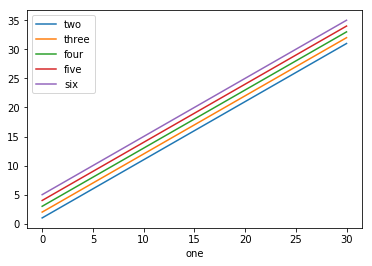

In [54]:
# изобразить зависимость столбцов 2-6 от 1
df.plot(x='one')

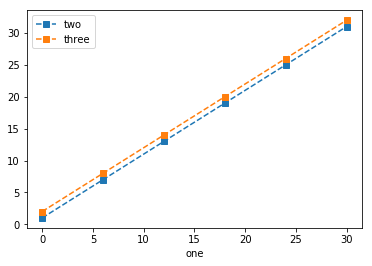

In [55]:
# изобразить зависимости только для столбцов 2,3 от 1
# изменить стиль линии и маркеры
df.plot(x='one', y=['two','three'], linestyle='--', marker='s')

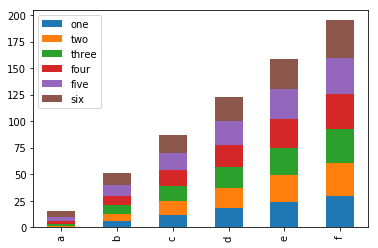

In [56]:
# изобразить столбчатую диаграмму
df.plot(kind='bar',stacked=True)

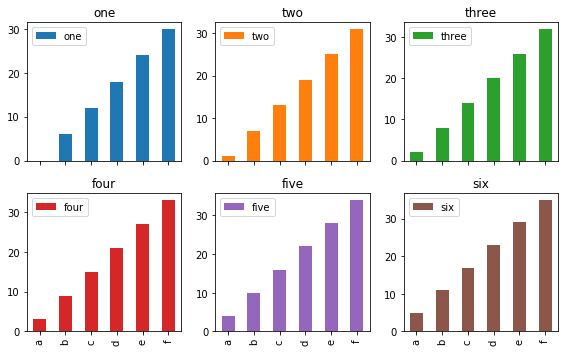

In [57]:
# изобразить 6 диаграмм на одном рисунке (для каждого столбца по графику)
df.plot(kind='bar', subplots=True, layout=(2,3), figsize=(8,5))
plt.gcf().tight_layout();

#### Сохранение DataFrame в файл и загрузка из файла

In [58]:
# сохранение DataFrame в CSV, XLS, JSON
df.to_csv('df.csv')
df.to_excel('df.xls')
df.to_json('df.json')

In [59]:
# для linux
# !cat df.csv

# для windows
!TYPE df.csv

,one,two,three,four,five,six
a,0,1,2,3,4,5
b,6,7,8,9,10,11
c,12,13,14,15,16,17
d,18,19,20,21,22,23
e,24,25,26,27,28,29
f,30,31,32,33,34,35


In [60]:
# для linux
# !cat df.json

# для windows
!TYPE df.json

{"one":{"a":0,"b":6,"c":12,"d":18,"e":24,"f":30},"two":{"a":1,"b":7,"c":13,"d":19,"e":25,"f":31},"three":{"a":2,"b":8,"c":14,"d":20,"e":26,"f":32},"four":{"a":3,"b":9,"c":15,"d":21,"e":27,"f":33},"five":{"a":4,"b":10,"c":16,"d":22,"e":28,"f":34},"six":{"a":5,"b":11,"c":17,"d":23,"e":29,"f":35}}


In [61]:
# открыть df.xls в приложении, ассоциированном с расширением xls (напр., Microsoft Excel)
import subprocess
subprocess.call("df.xls", shell=True)

0

![](df.xls.png)

In [62]:
# загрузка из CSV
pd.read_csv('df.csv', index_col=0)

,one,two,three,four,five,six
a,0,1,2,3,4,5
b,6,7,8,9,10,11
c,12,13,14,15,16,17
d,18,19,20,21,22,23
e,24,25,26,27,28,29
f,30,31,32,33,34,35


In [63]:
# загрузка из XLS
pd.read_excel('df.xls')

,one,two,three,four,five,six
a,0,1,2,3,4,5
b,6,7,8,9,10,11
c,12,13,14,15,16,17
d,18,19,20,21,22,23
e,24,25,26,27,28,29
f,30,31,32,33,34,35


In [64]:
# загрузка из JSON в словарь Python
import json
with open('df.json', 'rt') as f:
    d = json.load(f)
d

{'one': {'a': 0, 'b': 6, 'c': 12, 'd': 18, 'e': 24, 'f': 30},
 'two': {'a': 1, 'b': 7, 'c': 13, 'd': 19, 'e': 25, 'f': 31},
 'three': {'a': 2, 'b': 8, 'c': 14, 'd': 20, 'e': 26, 'f': 32},
 'four': {'a': 3, 'b': 9, 'c': 15, 'd': 21, 'e': 27, 'f': 33},
 'five': {'a': 4, 'b': 10, 'c': 16, 'd': 22, 'e': 28, 'f': 34},
 'six': {'a': 5, 'b': 11, 'c': 17, 'd': 23, 'e': 29, 'f': 35}}

In [65]:
# загрузка из JSON

pd.read_json('df.json')

,one,two,three,four,five,six
a,0,1,2,3,4,5
b,6,7,8,9,10,11
c,12,13,14,15,16,17
d,18,19,20,21,22,23
e,24,25,26,27,28,29
f,30,31,32,33,34,35


## Вопросы и дополнения к лекции


[Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

[10 Minutes To Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)

[Pandas CookBook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)